The fear of the LORD is the beginning of knowledge, but fools despise wisdom and discipline. Proverbs 1:7

-------

# Welcome to "AI for All"

Lecture Notes by idebtor@gmail.com, Handong Global University

# Chapter 3. 넘파이$^{NumPy}$ 튜토리얼(3/3)

## 학습 목표
    - 기계학습에서 왜 넘파이를 사용하는지 이해한다
    - 넘파이 개념과 기본적인 사용법을 익힌다.

## 학습 내용

1. 브로드캐스팅
2. 배열의 Axes(축) 다루기
3. 난수의 배열 생성
4. 자료의 읽기와 쓰기


## 1. 브로드캐스팅$^{broadcasting}$
브로드캐스팅이라는 말을 들으면 우리는 금방 "방송"이란 뜻이 생각이 납니다. 그런데, '방송'외에 '널리 전하다, 퍼뜨리다'의 뜻도 있습니다. 아마도 방송이 발명되기 전에는 이런 의미가 더 강했을 것 같습니다. 

일반적으로 서로 형상이 다른 배열끼리는 연산이 가능하지 않습니다. 다음 셀을 실행하면, ValueError가 나오면서 broadcast할 수 없다는 에러 메세지가 나옵니다. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

a = np.array([1,2,3])
b = np.array([1,2])
a + b

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

그런데, 어떤 조건이 맞을 경우에는 형상이 서로 다른 배열 간에도 산술 연산이 가능하게 하니다. 이를 브로드캐스팅이라고 합니다. 종종 작은 배열과 큰 배열이 있을 때, 큰 배열을 대상으로 작은 배열을 여러 번 연산하고자 할 때 사용합니다. 간단한 예는 배열의 각 행에 상수 벡터를 더하는 경우입니다. 

예를 들며, A행렬에 B벡터를 A행렬의 모든 행마다 더하기를 원할 때입니다. 

$ A = \begin{pmatrix} 1 & 2 & 3\cr 4 & 5 & 6 \cr 7 & 8 & 9 \cr 10 & 11 & 12 \end{pmatrix}, \quad
B = \begin{pmatrix} 1 & 0 & 1 \end{pmatrix} $

여기서 

$ A + B $

하면, 브로드캐스팅으로 인하여 B가 확장이 되어 마치 A의 형상처럼 되어 연산을 합니다. 

$ A + B = \begin{pmatrix} 1 & 2 & 3\cr 4 & 5 & 6 \cr 7 & 8 & 9 \cr 10 & 11 & 12 \end{pmatrix} + 
\begin{pmatrix} 1 & 0 & 1 \cr 1 & 0 & 1 \cr 1 & 0 & 1 \cr 1 & 0 & 1 \end{pmatrix} $

In [4]:
A = np.array(np.arange(1, 13)).reshape(4, 3)
B = np.array([1, 0, 1])
print(A + B)
print(A)
print(B)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[1 0 1]


#### Example 1. shape(3) + shape(1) = shape(3)

다음 그림과 같이 넘파이의 브로드캐스딩으로 연산이 가능하도록 코딩을 하십시오. 

넘파이 배열 `[0, 1, 2]`에 스칼라 5를 합한 결과가 `[5, 6, 7]`이 됩니다. 브로드캐스팅으로 5가 0이외에 1과 2의 원소 부분에도 전파(broadcast)되어 계산되어 간단하게 합산이 이루어집니다.

\begin{align}
  A = \begin{pmatrix} 0 & 1 & 2 \end{pmatrix} + \begin{pmatrix} 5 \end{pmatrix} 
    = \begin{pmatrix} 5 & 6 & 7 \end{pmatrix} 
\end{align}
    
<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/numpy-broadcast1.png?raw=true" width="500">
<center>그림 2: 브로드캐스팅 예제 1</center>

In [11]:
A = np.array([0, 1, 2]) + 5
print(A)

[5 6 7]


#### Example 2. shape(3, 3) + shape(3) = shape(3, 3)

다음 그림과 같이 넘파이의 브로드캐스딩으로 연산이 가능하도록 코딩을 하십시오. 

배열 간의 계산으로 배열의 차원이 확대된 경우인데, 3x3 배열에 1x3 배열을 합산한 경우입니다. 각 행에 동일한 계산을 전파한 것을 볼 수 있습니다.

\begin{align}
A = \begin{pmatrix} 1 & 1 & 1 \cr  1 & 1 & 1 \cr  1 & 1 & 1  \end{pmatrix} 
  + \begin{pmatrix} 0 & 1 & 2 \end{pmatrix} 
  = \begin{pmatrix} 1 & 2 & 3 \cr 1 & 2 & 3 \cr 1 & 2 & 3 \end{pmatrix} 
\end{align}
    
<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/numpy-broadcast2.png?raw=true" width="500">
<center>그림 3: 브로드캐스팅 예제 2</center>

In [12]:
A = np.ones((3, 3)) + np.arange(3)
print(A)

[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


#### Example 3.  shape(3, 1) + shape(1, 3) = shape(3, 3) 

다음 그림과 같이 넘파이의 브로드캐스딩으로 연산이 가능하도록 코딩을 하십시오. 

이 마지막 예제는 브로드캐스팅의 확장성 측면을 극명하게 보여주는 경우입니다. 3x1 배열과 1x3 배열의 합을 했는데 두 번째에서는 한쪽의 더 낮은 차원의 배열에서만 아래(0번 축) 방향으로 broadcast한 것에 반해 양 쪽 배열에서 broadcast한 것을 확인할 수 있습니다.

\begin{align}
A = \begin{pmatrix} 0 \cr 1 \cr 2 \end{pmatrix} + \begin{pmatrix} 0 & 1 & 2 \end{pmatrix} 
    = \begin{pmatrix} 0 & 1 & 2 \cr 1 & 2 & 3 \cr 2 & 3 & 4 \end{pmatrix} 
\end{align}
    
<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/numpy-broadcast3.png?raw=true" width="500">
<center>그림 4: 브로드캐스팅 예제 3</center>

In [14]:
x = np.arange(3).reshape(3, 1) + np.arange(3)
print(x)

[[0 1 2]
 [1 2 3]
 [2 3 4]]


지금까지 예제를 통해 보로드캐스팅을 할 수 있는 있었던 조건을 살펴보면, 
- 배열 연산에서 항상 1차원 배열이 포함되어 있어야 합니다. 
- 행/열의 어떤 축이든(0축이든지 혹은 1축이든지) 차원의 길이가 같아야 합니다. 예제의 경우(3x3 + 1x3,  3x1 + 1x3)와 같이 말입니다. 

#### Example 4.  shape(3,4,2) + shape(4,2) = shape(3, 4, 2)

다음 그림과 같이 넘파이의 브로드캐스딩으로 연산이 가능하도록 코딩을 하십시오. 

3차원 배열의 0번 축으로 브로드캐스팅 된 예시입니다. (3,4,2)형상의 3차원 배열과 (4,2)형상의 2차원 배열이 있습니다. 위에서 말한 조건처럼 차원의 짝이 맞아야 브로드캐스팅이 수행될 수 있습니다. 2차원 배열의 형상(4,2)가 3차원 배열의 형상(4,2)와 짝이 맞기 때문에 누락된 부분인 3만큼의 차원 확장(broadcasting)이 되고 합산이 일어납니다. 0번 축으로 브로드캐스팅이 된 것입니다.

브로드캐스팅은 저차원의 배열을 연산을 위해서 고차원 배열로 확장시키는 것과 같습니다.

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/numpy-broadcast4.png?raw=true" width="500">
<center>그림 5: 브로드캐스팅 예제 4</center>
<center>출처: Python 기초:http://sacko.tistory.com/</center>

In [17]:
x = np.arange(24).reshape(4, 2, 3) + np.arange(6).reshape(2, 3)
print(x)

[[[ 0  2  4]
  [ 6  8 10]]

 [[ 6  8 10]
  [12 14 16]]

 [[12 14 16]
  [18 20 22]]

 [[18 20 22]
  [24 26 28]]]


## 2. 배열의 축(Axis) 다루기

기계학습에서 자료를 다루다보면, Numpy 배열의 축(Axis)를 필수적으로 이해해야 할 필요가 종종 생깁니다. 

예를 들면, 다음 그림과 같은 3차원 배열은 어떻게 만들수 있을까요? 또한 axis = 0에 대한 np.sum()는 어떤 값을 반환할까 하는 문제입니다. 배열의 axis를 확실히 이해하지 않으면, 참 까다로운 문제입니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ndarray.png?raw=true" width="600">
<center>그림 6: 넘파이 1차원, 2차원 및 3차원 배열과 Axis</center>

### 2차원 배열의 경우

자, 그러면 이 문제를 정확하게 이해하기 위하여 np.sum() 함수를 이용하여 2차원의 예제부터 살펴보도록 하겠습니다. 

In [18]:
a = np.arange(6).reshape(2,3)
print(a)

[[0 1 2]
 [3 4 5]]


#### Example 1. 배열 a의 모든 원소의 합을 구하십시오. 

In [21]:
y = sum(a)
print(y)
x = np.sum(a)
print(x)

[3 5 7]
15


#### Example 2. 배열 a에서 각 축의 합을 구하십시오. 

배열의 두 축 즉 axis=0 혹은 axis=1을 지정하면 각 축에 대한 합을 구할 수 있습니다. 그런데, 그 축의 합은 어느 값들의 합일까하는 문제입니다. 다음과 같이 실행했을 때, 출력은 무엇인가요? 

`np.sum(a, axis=0)`   
`np.sum(a, axis=1)`

제가 답을 말하기 전에 여러분이 먼저 답을 생각해보면 좋겠습니다. 먼저 형상은 무엇인지, 원소의 값은 무엇인지 생각해보십시오. 

In [22]:
print(np.sum(a, axis = 0))
print('sum(axis = 0):', np.sum(a, axis=0))

[3 5 7]
sum(axis = 0): [3 5 7]


여러분이 생각한 것과 같은가요?
- aixs = 0 즉 행을 기준으로 각 행의 동일 인덱스의 원소를 그룹으로 합니다
- aixs = 1 즉 열을 기준으로 각 열의 동일 인덱스의 원소를 그룹으로 합니다
axis = 0를 기준으로 각 행의 인덱스가 각각 0, 1, 2 원소들끼리 합한 것이 정답입니다. 그러므로, 배열의 형상은 (3,)입니다. 

한 번 연습을 해볼까요? 다음과 같이 실행했을 때, 형상과 원소의 값을 무엇인가요?

`np.max(a, axis=1)`

제가 답을 말하기 전에 여러분이 먼저 답을 생각해보면 좋겠습니다.

In [24]:
print(np.max(a, axis = 1))
print('max(axis = 1):', np.max(a, axis=1))

[2 5]
max(axis = 1): [2 5]


배열에서 axis=1 즉 3개의 열들 중에서 인덱스가 같은 원소들끼리 비교하여 최대값을 구한 것입니다. 3개 중에 하나를 선택하는 것을 두 번해야 합니다. 

### 3차원 배열의 경우

#### Example 1. 다음 그림과 같은 두 배열을 생성하십시오. 

2차원 배열은 1차원 배열(벡터)를 두 개 이상을 모아 둔 것이며, 3차원 배열은 2차원 배열을 두 개 이상 모아둔 것
3차원 배열은 2차원의 배열을 두 개 이상 존재하는 것입니다.  다음과 같은 (4 x 2)배열을 넘파이로 어떻게 생성할 수 있을까요?

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/numpy3d.png?raw=true" width="400">
<center>그림 6: 넘파이 2차원, 3차원 배열</center>

In [26]:
a = np.arange(8).reshape(4,2)
print(a.shape)
print(a)

(4, 2)
[[0 1]
 [2 3]
 [4 5]
 [6 7]]


그림의 배열과 넘파이가 출력하는 배열의 모양이 같은 것을 볼 수 있습니다. 그러면, 다음과 같은 3차원 배열은 어떻게 생성할 수 있을까요? 3차원 배열은 (4, 2) 2차원 배열을 3개를 모은 것입니다. 

In [27]:
a = np.arange(24).reshape(3, 4, 2)
print(a.shape)

(3, 4, 2)


#### Example 2. np.sum(a, axis = 0)은 어떤 형상이며, 값은 무엇일까요?

In [28]:
print(a)
x = np.sum(a, axis=0)
print(x.shape)
print(x)

[[[ 0  1]
  [ 2  3]
  [ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]
  [12 13]
  [14 15]]

 [[16 17]
  [18 19]
  [20 21]
  [22 23]]]
(4, 2)
[[24 27]
 [30 33]
 [36 39]
 [42 45]]


축 axis = 0과 같은 방향으로 시선을 향하면 됩니다. 그러면, 형상은 당연히 (4, 2)가 보일 것입니다. 그리고 같은 위치에 있는 원소들을 합하면 됩니다. 예를 들면, (0, 4, 1), (1, 4, 1), (2, 4, 1) 위치의 원소를 다 합하면 45가 되는 것을 알 수 있습니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/numpy3d-axis0.png?raw=true" width="200">
<center>그림 6: 3차원 배열의 축(axis = 0)</center>

#### Example 3. np.min(a, axis = 1)은 어떤 형상이며, 값은 무엇일까요?

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/numpy3d-axis1.png?raw=true" width="200">
<center>그림 6: 3차원 배열의 축(axis = 1)</center>

축 axis = 1과 같은 방향으로 시선을 향하면 됩니다. 그러면, 형상은 당연히 (3, 2)가 보일 것입니다. 그 위치에 있는 원소들 중에 작은 값을 택하면 됩니다. 이런 경우, 모두 가장 위에 있는 값들이 가장 작은 것을 알 수 있습니다.  


In [29]:
x = np.min(a, axis = 1)
print(x.shape)
print(x)

(3, 2)
[[ 0  1]
 [ 8  9]
 [16 17]]


#### Example 3. np.max(a, axis = 2)은 어떤 형상이며, 값은 무엇일까요?

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/numpy3d-axis2.png?raw=true" width="200">
<center>그림 6: 3차원 배열의 축(axis = 2)</center>


축 axis = 2의 방향으로 시선을 향하면 됩니다. 그러면, 형상은 (3, 4)가 보일 것입니다. 그 위치에 있는 원소들 중에 큰 값을 택하면 됩니다. 이런 경우, 시선에 가장 멀리 있는 원소들 (앞에서 볼 때, 가장 오른쪽) 가장 큰 값인 것을 알 수 있습니다. 

In [30]:
x = np.max(a, axis = 2)
print(x.shape)
print(x)

(3, 4)
[[ 1  3  5  7]
 [ 9 11 13 15]
 [17 19 21 23]]


2차원 배열을 건물의 `[floor][room]`이라고 생각해보십시오. (참고로, 이미지(영상,화면)에서 x, y좌표는 좌측상단 코너가 원점(0,0)이며, x는 오른쪽으로, y는 아래쪽으로 양의 방향입니다) 이런 이미지 좌표 체계를 이해하면, 2차원일 경우는 서로 일치가 되니까 쉽게 이해할 수 있습니다.

그런데, 3차원일 경우는 직접 비유하기가 좀 어렵네요. 

한 방법은 axis=2에서 바라보는 것처럼, axis=2를 배열 형상(3, 4, 2)에서 제외하면 배열 형상은 (3, 4)가 남게된다고 생각할 수 있습니다. 이런 것을 다차원으로 일반화 할 수는 없겠지만, 3차원에서는 가능할 것입니다. 

또 다른 한 방법은 `[address][floor][room]`이라고 생각해보면 어떨까 합니다. 이런 거죠 `[axis=0][axis=1][axis=2] = [address][floor][room]`에서, address는 길이 나아가는 방향으로 진행하고, floor건물의 지하층으로 내려가고, room은 오른쪽으로 나아갑니다.

넘파이 3d 배열에 억지로 비유 하자면, 좌측상단 코너를 (0,0,0)로 삼고, 앞으로 전진하는 (address,번지수)을 0축(x)으로, 밑으로 내려가는 (floor,층)을 1축(y)으로 잡고, 그 다음 오른쪽으로 나가가는 (room, 방)을 2축(z)이 될 것입니다.

그러면, 넘파이 4d배열은 `[street][address][floor][room]`라고 비유할 수 있겠습니다. 

#### Example 4. 다음과 그림과 같은 3차원 배열을 생성하십시오. 

그림6과 비슷한 3차원 배열을 생성하여, 배열의 축에 대해 예제로 다루어 보기로 합니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ndarray2.png?raw=true" width="600">

<center>그림 7: 넘파이 1차원, 2차원 및 3차원 배열과 Axis 0 의미의 변화</center>

1차원 배열에 있는 유일한 축 즉 첫 번째 축이 axix 0 입니다. 2차원 배열에서 axis 0는 행(row)의 갯수입니다.  2차원 배열이 여러 개 모여 3차원의 배열을 이루는데, 그 첫 번째 axis는 2차원 배열의 갯수입니다. 배열 shape의 첫 번째 요소가 항상 axis 0에 해당합니다. 

아래 코드에서 만들어내는 배열은 (2, 3) 2차원 배열이 4개 모인 것이며, shape은 (4, 2, 3)이 될 것입니다. 

In [ ]:
a = np.arange(24).reshape(4, 2, 3)
print(a)

#### Example 5.  배열 a 에 대하여, axis = 0 및 axis = 1 의 sum을 각각 손으로 계산하고, 또한 코드로 확인하십시오.  

크기가 (2, 3)인 4개의 배열들의 원소들을 각각 더하면 될 것입니다. 우선 그러한 배열을 생성하여 출력하고, 우리가 머리로 먼저 계산하고, 이것을 코딩하여 확인합니다.  이제 크기가 (2, 3)인 4개의 배열들의 원소들을 각각 더하면, 결과를 내면 그 형상은 당연히 (2, 3)가 될 것입니다.  

```
 [[36 40 44]
  [48 52 56]]]
  
```

In [ ]:
x = np.sum(a, axis = 0)
print(x)

In [ ]:
x = np.sum(a, axis = 1)
print(x)

예를 들면, 어떤 배열의 크기(shape)가 (60000, 28, 28)이라고 한다면, 배열의 크기가 (28, 28)인 2차원 배열이 6만개 있다는 것입니다. 2차원 배열은 흔히 이미지를 나타내는 많이 사용됩니다. 좀 더 구체적으로 말하면, 채널이 하나인 흑백 이미지가 6만 장이라는 말입니다. 

## 3. 2차원 배열을 이미지로 다루기

다음과 같은 간단한 코드로 256개의 원소(0 ~ 255)를 가진 2차원 배열(16, 16)을 만들어 시각화한 것입니다. 

```
import matplotlib.pyplot as plt
image = np.arange(256).reshape(16, 16)
plt.imshow(image, cmap="gray")
```

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/16x16image.png?raw=true" width="256">

<center>그림 8: 2차원 배열의 시각화</center>

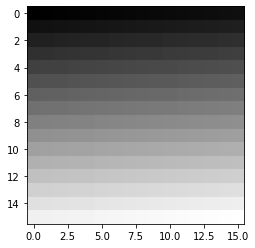

In [31]:
import matplotlib.pyplot as plt
image = np.arange(256).reshape(16, 16)
plt.imshow(image, cmap="gray")

#### Example 1. 주어진 이미지(16, 16)에서 처음과 마지막 두 행(row)를 출력하십시오. 
```
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]]
[[224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239]
 [240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255]]
 ```

In [50]:
print(image[:2, :])
print(image[-2:, :])

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]]
[[224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239]
 [240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255]]


#### Example 2. 주어진 이미지(16, 16)에서 처음과 마지막 두 열(column)을 출력하십시오. 

In [32]:
print(image[:, :2])
print(image[:, -2:])

[[  0   1]
 [ 16  17]
 [ 32  33]
 [ 48  49]
 [ 64  65]
 [ 80  81]
 [ 96  97]
 [112 113]
 [128 129]
 [144 145]
 [160 161]
 [176 177]
 [192 193]
 [208 209]
 [224 225]
 [240 241]]
[[ 14  15]
 [ 30  31]
 [ 46  47]
 [ 62  63]
 [ 78  79]
 [ 94  95]
 [110 111]
 [126 127]
 [142 143]
 [158 159]
 [174 175]
 [190 191]
 [206 207]
 [222 223]
 [238 239]
 [254 255]]


#### Example 3. 이미지 추출하기 

기계학습을 진행하다 보면, 이미지를 일부분을 추출(Slicing)해야 할 때가 종종 있습니다. 주어진 이미지(16, 16)에서 처음과 마지막 두 행과 열을 제외한 부분 이미지(8x8)를 추출하십시오
- 추출한 이미지의 첫 픽셀과 마지막 픽셀의 값을 출력하여, 각각 `68, 187`인 것을 확인하십시오.  
- 추출한 이미지를 시각화 하십시오. 

68 187


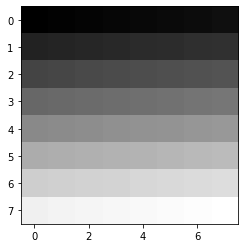

In [3]:
image = np.arange(256).reshape(16, 16)
center = image[4:-4, 4:-4]
print(center[0, 0], center[-1, -1])
plt.imshow(center, cmap="gray")

#### Example 6. 이미지 이동하기

기계학습을 진행하다 보면, 이미지를 아래로, 오른쪽으로 혹은 위로, 왼쪽 이동해야 할 때가 있습니다. 이를 위해 ndarray처럼 ndimage 라이브러리가 제공됩니다. 수많은 함수 중에 이미지를 이동할 수 있는 shift함수가 있으며, 이동한 빈 자리에 어떤 값으로 채울지에 여러 옵션도 있습니다. 

shfit함수의 두 번째 인자가 shift인데, 이것을 정확히 설정하는 것이 중요합니다. 이 함수는 축에 따라 이미지를 shift하는데, 2D텐서(2차원 배열, 이미지)에서 axis 0는 위에 아래 방향이고, axis 1은 왼쪽에서 오른쪽 방향입니다. 넘파이 2차원 배열과 일치합니다.

[scipy.ndimage.interpolation.shift](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.shift.html) 를 검색해서 살펴 보십시오. 

```
scipy.ndimage.interpolation.shift(input, shift, output=None, order=3, mode='constant', cval=0.0, prefilter=True)
```
- input : ndarray - The input array.
- shift : float or sequence, optional, 

<p style="color:blue">The shift along the axes. If a float, shift is the same for each axis. If a sequence, shift should contain one value for each axis. </p>

위와 같은 설명에 따라 두 번째 shift 매개변수를 axis에 따라 어떻게 이동할지 설정해야 합니다. 이를 참고로 하여 아래 이미지(original)를 상/하, 좌우로 3 픽셀을 옮기고, 그 빈 자리에는 100으로 채우도록 코딩하십시오. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/midterm14.png?raw=true" width="600">

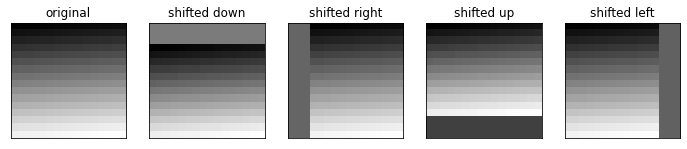

In [66]:
from scipy.ndimage.interpolation import shift

shifted_down = shift(image, [3, 0], cval=100)  
shifted_right = shift(image, [0, 3], cval=100)  
shifted_up = shift(image, [-3, 0], cval=100)  
shifted_left = shift(image, [0, -3], cval=100)  
# your code here

fig, ax = plt.subplots(1, 5, figsize=(12,12))  ## 조정 필요 subplot(row, col, figsize) ##
ax[0].imshow(image, cmap = "gray")
ax[1].imshow(shifted_down, cmap="gray")
ax[2].imshow(shifted_right, cmap="gray")
ax[3].imshow(shifted_up, cmap="gray")
ax[4].imshow(shifted_left, cmap="gray")
# your code here

ax[0].set_title("original")
ax[1].set_title("shifted down")
ax[2].set_title("shifted right")
ax[3].set_title("shifted up")
ax[4].set_title("shifted left")
# your code here

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.show()

## 4. 난수의 배열 생성

파이썬의 numpy.random 모듈에는 난수를 기반으로 난수를 발생하여 배열을 만드는 여러 함수를 제공합니다. 그 중에서 기계학습에서 종종 사용하는 세 개만 소개합니다. 

- `randint(low, high=None, size=None, dtype='l')`
  low 부터 high 미만의 범위에서 정수 표본을 추출하여 지정된 shape으로 배열을 반환
- `normal(loc=0.0, scale=1.0, size=None)` 
  정규 분포 확률 밀도에서 표본을 추출하여 배열로 반환하며, 정규 분포의 평균(loc), 표준편차(scale)을 지정할 수 있음.
- `random(size=None)`
  `[0., 1.)` 범위의 난수를 균등 분포(Uniform Distribution)에서 표본 추출하여 배열로 반환

In [34]:
a = np.random.randint(-5, 5, size=(2, 4))
print(a)

[[-3 -4 -1 -5]
 [ 4 -3  0 -5]]


In [35]:
mean = 10
std = 1
a = np.random.normal(mean, std, (2, 4))
print(a)

[[10.0533598   9.96482931 10.21898984 10.71601597]
 [10.61701491  9.11732208  9.65899424  9.1151426 ]]


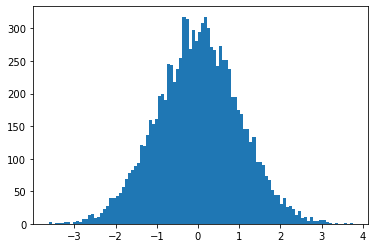

In [36]:
data = np.random.normal(0, 1, 10000)
plt.hist(data, bins=100)
plt.show()

[[0.93661969 0.53340021 0.81629522 0.06001803]
 [0.40273435 0.81860283 0.91873808 0.46954769]]


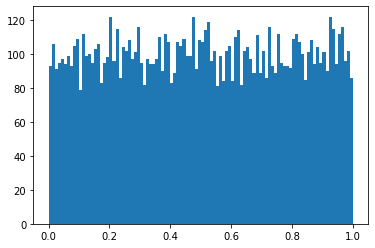

In [37]:
a = np.random.random((2, 4))
print(a)
data = np.random.random(10000)
plt.hist(data, bins=100)
plt.show()

#### 난수 발생에 대한 노트
기계학습에서 난수를 자주 사용합니다. 그런데, 주의할 점이 하나 있습니다. 난수를 발생하는 알고리즘은 특정한 시작 숫자로부터 무작위로 숫자를 만들어 냅니다. 따라서 시작점을 알면 난수 발생을 똑같이 반복할 수 있습니다. 이렇게 난수 발생을 재연하기 위해 난수의 시작점을 지정할 수 있는 함수가 있는데, 그것이 바로 np.random.seed 입니다.
다음 예를 살펴봅시다. 

In [11]:
np.random.seed(100)

In [12]:
np.random.random((2, 2))

array([[0.54340494, 0.27836939],
       [0.42451759, 0.84477613]])

In [13]:
np.random.randint(0, 10, (2, 3))

array([[4, 2, 5],
       [2, 2, 2]])

In [14]:
# 위의 seed값을 다시 설정하여, 아래에서 난수가 재연 가능하도록 함
np.random.seed(100)  

In [15]:
np.random.random((2, 2))

array([[0.54340494, 0.27836939],
       [0.42451759, 0.84477613]])

In [16]:
np.random.randint(0, 10, (2, 3))

array([[4, 2, 5],
       [2, 2, 2]])

기계학습에 특별히 개발할 때는 임의의 seed값을 정하여 난수를 발생할 것을 권장합니다. 왜냐하면, 만약에 디버깅할 경우에 버그가 발생한 상황을 재연할 수 있어야 하기 때문입니다. 

## 5. 자료 쓰기와 읽기 
기계학습의 학습 자료 데이터 셋을 저장할 때 다양한 방식이 있을 수 있겠지만, 간단한 두 가지 방법 중에 중에 하나를 사용합니다. 
- 하나는 행 벡터 방식이고, 또 다른 하나는 열 벡터 방식입니다. 물론 그런 데이터를 읽고 적절히 가공하여 학습에 사용할 수 있어야 합니다. 

- 파일로 저장할 때 사용하는 명령어 `%%writefile` 셀매직(Cell Magic)명령어입니다. `%%`로 시작하는 셀매직 명령어는 항상 셀의 첫줄에 나와야 합니다. 특별히 `%%writefile` 명령어는 셀의 내용을 파일로 저장할 때, 만약 이미 해당 폴더에 같은 이름의 파일이 존재할지라도 아무런 경고없이 덮어쓰기를 하니까 유의해야 합니다. 

- 기계학습 자료를 파일에 저장하거나 읽는 함수 라이브러리로 pandas를 많이 사용하지만, 간단한 자료는 넘파이의 `loadtxt()`, `genfromtxt()`, `savetxt()` 함수도 자주 사용합니다. 는 것도 좋습니다.  


#### loadtxt() - Load data from a text file.
```
numpy.loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None)
```

#### genfromtxt() - Load data from a text file, with missing values handled as specified
```
numpy.genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=" !#$%&'()*+, -./:;<=>?@[\]^{|}~", replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding='bytes')[source]¶
```

#### savetxt() - Save an array to a text file
```
numpy.savetxt(fname, X, fmt='%.18e', delimiter=' ', newline='n', header='', footer='', comments='# ', encoding=None)
```

### 자료 쓰기
다음은 numpy를 이용하여 행 벡터 방식으로 파일에 저장된 자료를 열 벡터 방식으로 읽는 코드입니다. 

행$^{row}$ 벡터 방식으로 데이터를 저장합니다. 

In [ ]:
%%writefile ./data/joyxor.txt
# writing a data file
# xor data with bias X0 - row vector style
# x0 x1 x2 y
1 0 0 0
1 0 1 1
1 1 0 1
1 1 1 0

In [ ]:
# read and display a file  
!cat  ./data/joyxor.txt

### 행 벡터 - row vector  (Read rows in rows)

행 벡터로 기록되어 있으니, 행 벡터로 읽는 작업은 쉽게 할 수 있습니다. 

In [ ]:
import numpy as np
data = np.loadtxt('./data/joyxor.txt', dtype=int)
print(data)
X, y = data[:, :3], data[:, 3]
print(X)
print(y)

### 컬럼 벡터 - column vector (Read rows in columns)

기계학습 자료가 헤더 행을 포함하지 않고 공백으로 구분된 숫자들로 구성되어 있다면 `loadtxt()` 함수를 사용하여 txt 파일이나 csv 파일로부터 넘파이 배열로 쉽게 읽어와 사용할 수 있습니다. 다음과 같은 편리한 옵션도 있습니다.

- `unpack` 옵션을 사용하여 row vector를 column vector로 변환(전치)할 수 있습니다.
- `dtype` 옵션을 이용하여 읽어오는 자료형 정할 수 있습니다. 
- `delimit` 옵션을 자료들을 구분할 수 있으며, 디폴트는 '공백'입니다. 

In [ ]:
import numpy as np
data = np.loadtxt('./data/joyxor.txt', unpack=True, dtype='float32')
pprint(data)

In [ ]:
X = data[:-1]   # same as data[:-1]
print(X)
print(X.T)

In [ ]:
y = data[-1] 
y

In [ ]:
import numpy as np
data = np.loadtxt('./data/train3.csv', dtype=str)
print(data)

## 학습 정리

- 넘파이를 사용하는 이유 
- 넘파이 개념과 사용법 
    - 브로드캐스팅
    - 배열의 축 다루기
    - 난수 배열


### 참고자료
- CS231n Convolutional Neural Networks for Visual Recognition, [Python Numpy Tutorial](http://cs231n.github.io/python-numpy-tutorial/), Stanford University
- [데이터 사이언스 스쿨](https://datascienceschool.net/view-notebook/17608f897087478bbeac096438c716f6/)
- Python Numpy Tutorial - http://cs231n.github.io/
- 김태완 블로그: [파이썬 데이터 사이언스 Cheat Sheet](http://taewan.kim/post/numpy_cheat_sheet/)